In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [2]:
# Load Dataset
data = pd.read_csv('data.csv')
data.head()

,id,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,diagnosis
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [3]:
# Drop Unnecessary Columns if present
if 'Unnamed: 32' in data.columns:
    data.drop('Unnamed: 32', axis=1, inplace=True)
if 'id' in data.columns:
    data.drop('id', axis=1, inplace=True)


In [4]:
# Encode Labels
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
data['diagnosis']

0      0
1      0
2      0
3      0
4      0
      ..
564    1
565    1
566    1
567    1
568    1
Name: diagnosis, Length: 569, dtype: int64

In [5]:
# Split features and labels
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [6]:
# Build Deep Learning Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],),name='Input_layer'),
    Dropout(0.3),
    Dense(64, activation='relu', name='First_hidden_layer'),
    Dropout(0.3),
    Dense(32, activation='relu', name='Second_hidden_layer'),
    Dropout(0.3),
    Dense(1, activation='sigmoid', name='Output_layer')
])


c:\Users\Uditya\Desktop\Deep Learning\Deep Learning for Beginner\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


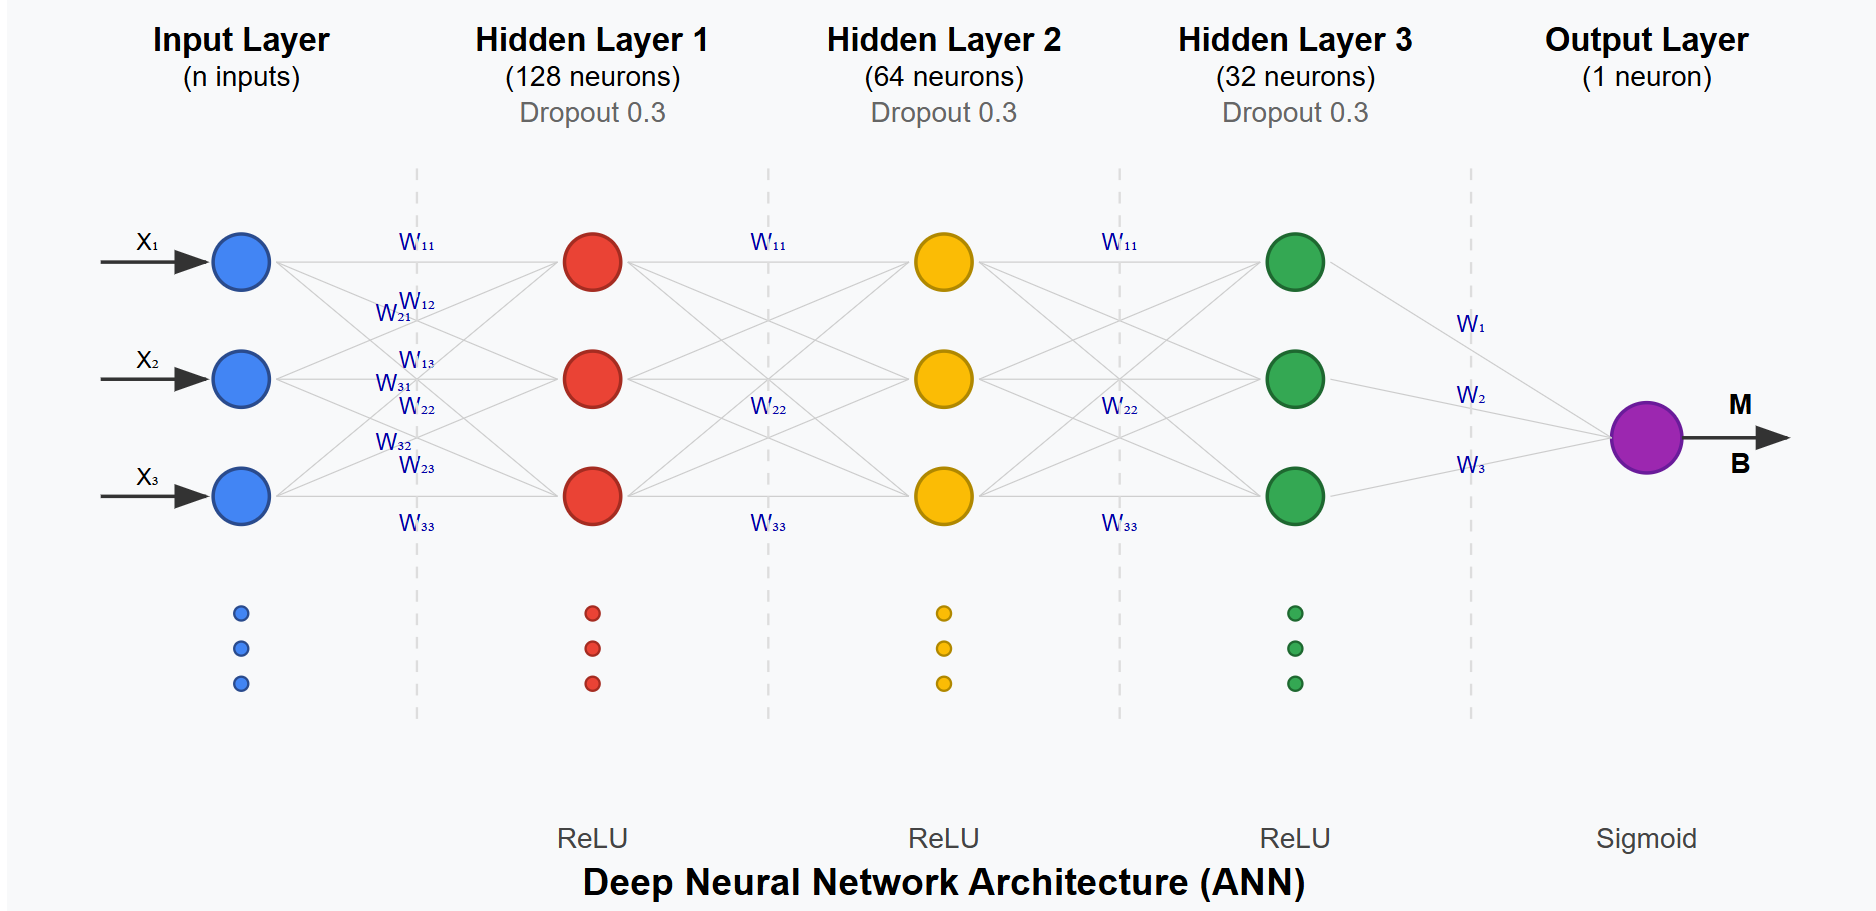
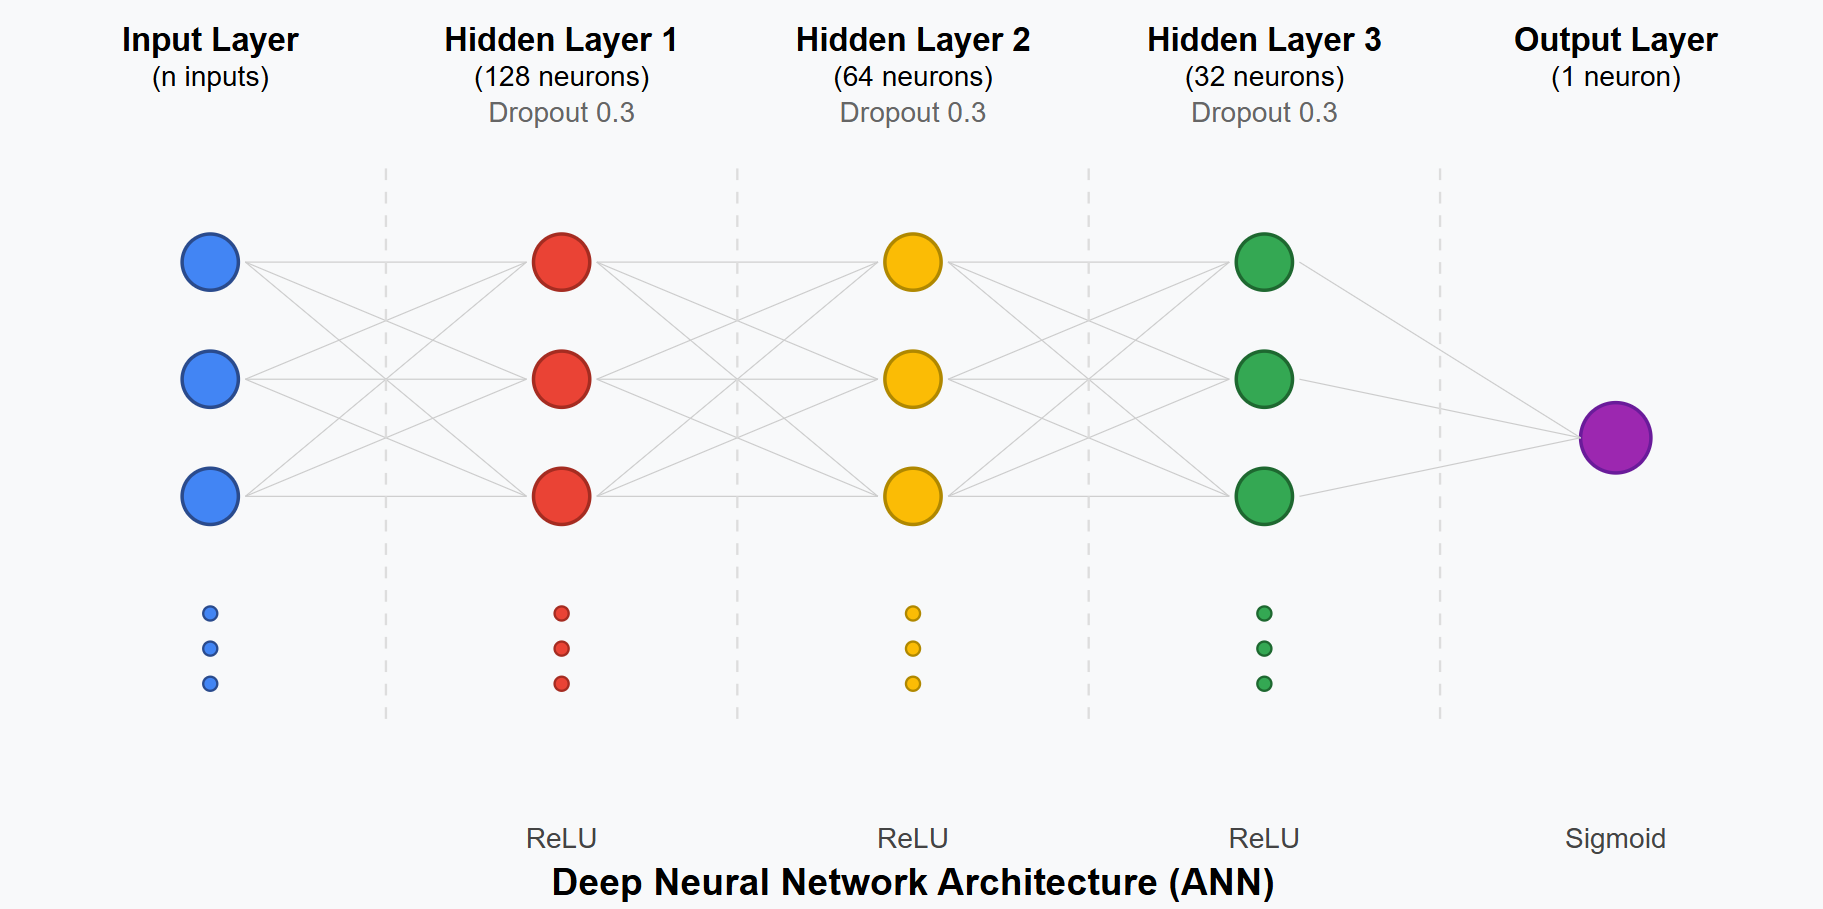

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Dense)             │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ First_hidden_layer (Dense)      │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Second_hidden_layer (Dense)     │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,337 (56.00 KB)

 Trainable params: 14,337 (56.00 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate Model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.5576 - loss: 0.6892 - val_accuracy: 0.8901 - val_loss: 0.4203
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8557 - loss: 0.4311 - val_accuracy: 0.9231 - val_loss: 0.2509
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9151 - loss: 0.2726 - val_accuracy: 0.9560 - val_loss: 0.1691
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9625 - loss: 0.1675 - val_accuracy: 0.9560 - val_loss: 0.1234
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9678 - loss: 0.1247 - val_accuracy: 0.9560 - val_loss: 0.0929
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9721 - loss: 0.1096 - val_accuracy: 0.9670 - val_loss: 0.0738
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9762 - loss: 0.1053 - val_accuracy: 0.9670 - val_loss: 0.0618
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9643 - loss: 0.0888 - val_accuracy: 0.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step 


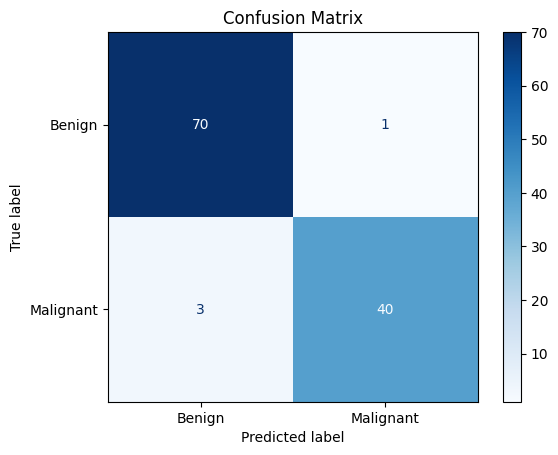

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predict on test data
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.savefig("results/confusion_metrics.png")  
plt.show()


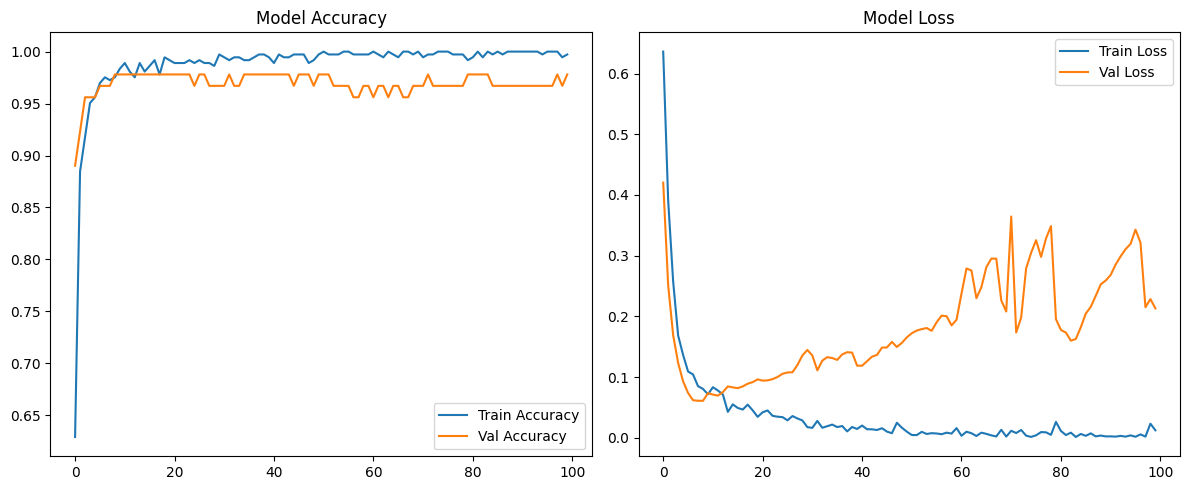

In [10]:
import os

# Create results folder if not exists
os.makedirs("results", exist_ok=True)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()

# Save the plot
plt.savefig("results/training_metrics.png")  
plt.show()


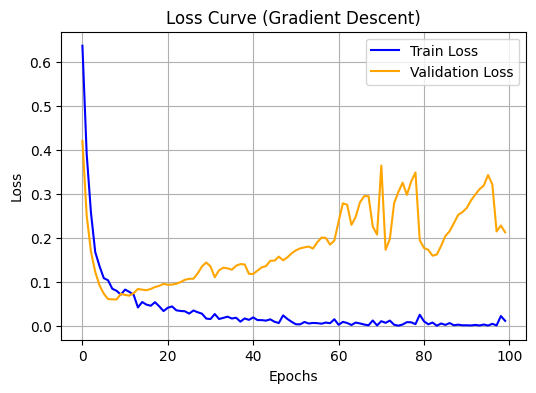

In [11]:
# Plotting only Loss (Gradient Descent Visualization)
import os
os.makedirs("results", exist_ok=True)

plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Curve (Gradient Descent)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.savefig("results/loss_gradient_descent.png")
plt.show()



Epoch 1/100
Loss: 0.0767

Epoch 2/100
Loss: 0.0339

Epoch 3/100
Loss: 0.1016

Epoch 4/100
Loss: 0.0270

Epoch 5/100
Loss: 0.0352

Epoch 6/100
Loss: 0.0327

Epoch 7/100
Loss: 0.0108

Epoch 8/100
Loss: 0.0140

Epoch 9/100
Loss: 0.0108

Epoch 10/100
Loss: 0.0175

Epoch 11/100
Loss: 0.0129

Epoch 12/100
Loss: 0.0269

Epoch 13/100
Loss: 0.0159

Epoch 14/100
Loss: 0.0097

Epoch 15/100
Loss: 0.0078

Epoch 16/100
Loss: 0.0082

Epoch 17/100
Loss: 0.0052

Epoch 18/100
Loss: 0.0094

Epoch 19/100
Loss: 0.0046

Epoch 20/100
Loss: 0.0038

Epoch 21/100
Loss: 0.0072

Epoch 22/100
Loss: 0.0057

Epoch 23/100
Loss: 0.0047

Epoch 24/100
Loss: 0.0037

Epoch 25/100
Loss: 0.0011

Epoch 26/100
Loss: 0.0092

Epoch 27/100
Loss: 0.0328

Epoch 28/100
Loss: 0.0046

Epoch 29/100
Loss: 0.0137

Epoch 30/100
Loss: 0.0038

Epoch 31/100
Loss: 0.0062

Epoch 32/100
Loss: 0.0043

Epoch 33/100
Loss: 0.0052

Epoch 34/100
Loss: 0.0071

Epoch 35/100
Loss: 0.0015

Epoch 36/100
Loss: 0.0031

Epoch 37/100
Loss: 0.0018

Epoch 38/

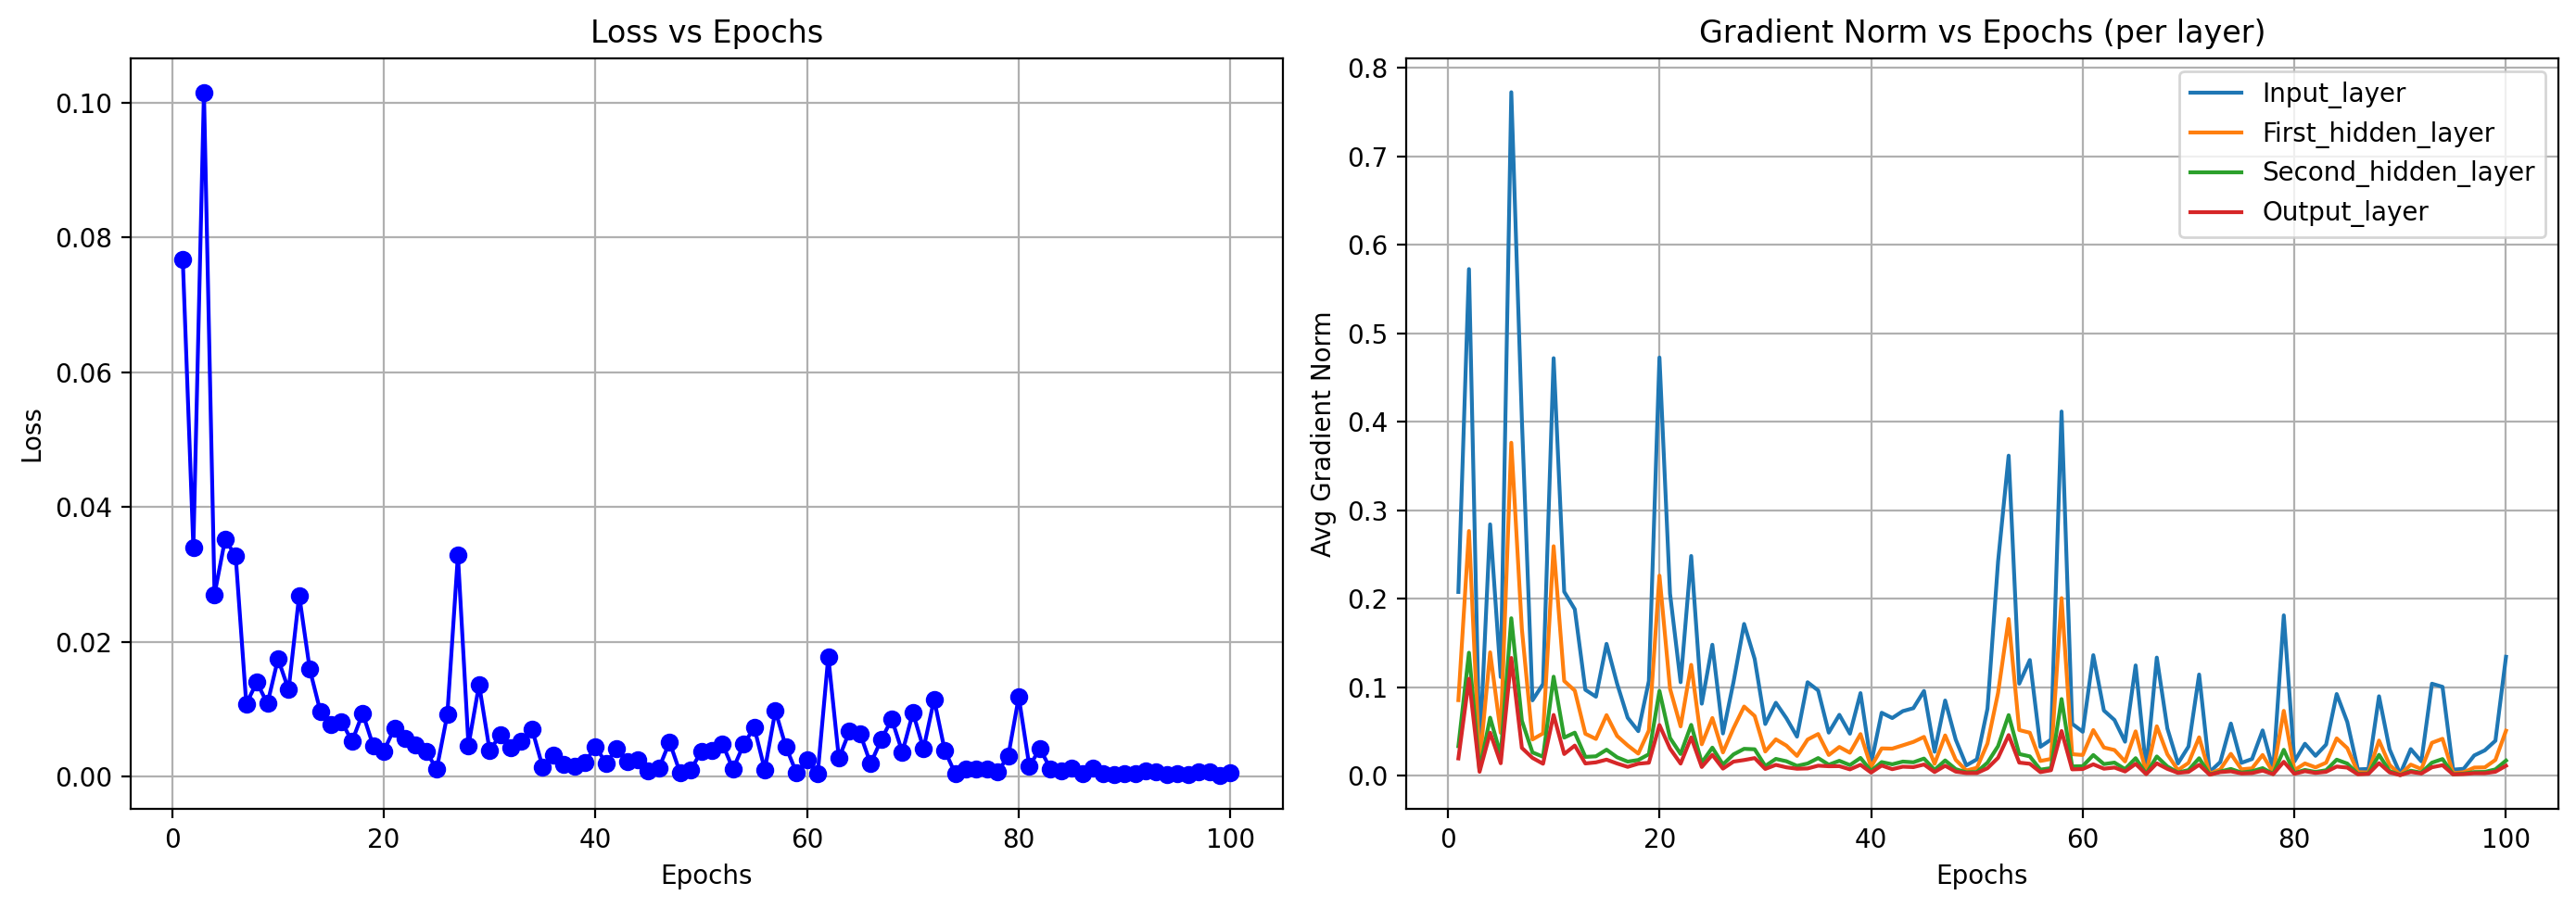

In [12]:
# Prepare Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(16)

# Optimizer & Loss
loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()

# For Tracking
gradient_norms = {layer.name: [] for layer in model.layers if len(layer.trainable_variables) > 0}
losses = []

# Training Loop
epochs = 100
for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")
    epoch_losses = []
    
    for step, (x_batch, y_batch) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            logits = model(x_batch, training=True)
            loss_value = loss_fn(y_batch, logits)

        grads = tape.gradient(loss_value, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        epoch_losses.append(loss_value.numpy())

        # Save gradient norms
        idx = 0
        for layer in model.layers:
            if len(layer.trainable_variables) > 0:
                for var in layer.trainable_variables:
                    grad = grads[idx]
                    norm = tf.norm(grad).numpy() if grad is not None else 0
                    gradient_norms[layer.name].append(norm)
                    idx += 1

    # Average loss of epoch
    epoch_loss = np.mean(epoch_losses)
    losses.append(epoch_loss)
    print(f"Loss: {epoch_loss:.4f}")

# Plotting
plt.figure(figsize=(14, 5), dpi=200)

# Loss vs Epoch
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), losses, marker='o', color='blue')
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)

# Gradient Norm vs Epoch (per layer)
plt.subplot(1, 2, 2)
steps_per_epoch = len(train_dataset)

for layer_name, norms in gradient_norms.items():
    norms = np.array(norms)
    avg_per_epoch = [np.mean(norms[i*steps_per_epoch:(i+1)*steps_per_epoch]) for i in range(epochs)]
    plt.plot(range(1, epochs+1), avg_per_epoch, label=layer_name)

plt.title("Gradient Norm vs Epochs (per layer)")
plt.xlabel("Epochs")
plt.ylabel("Avg Gradient Norm")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("results/gradient_norm_per_epoch.png")
plt.show()


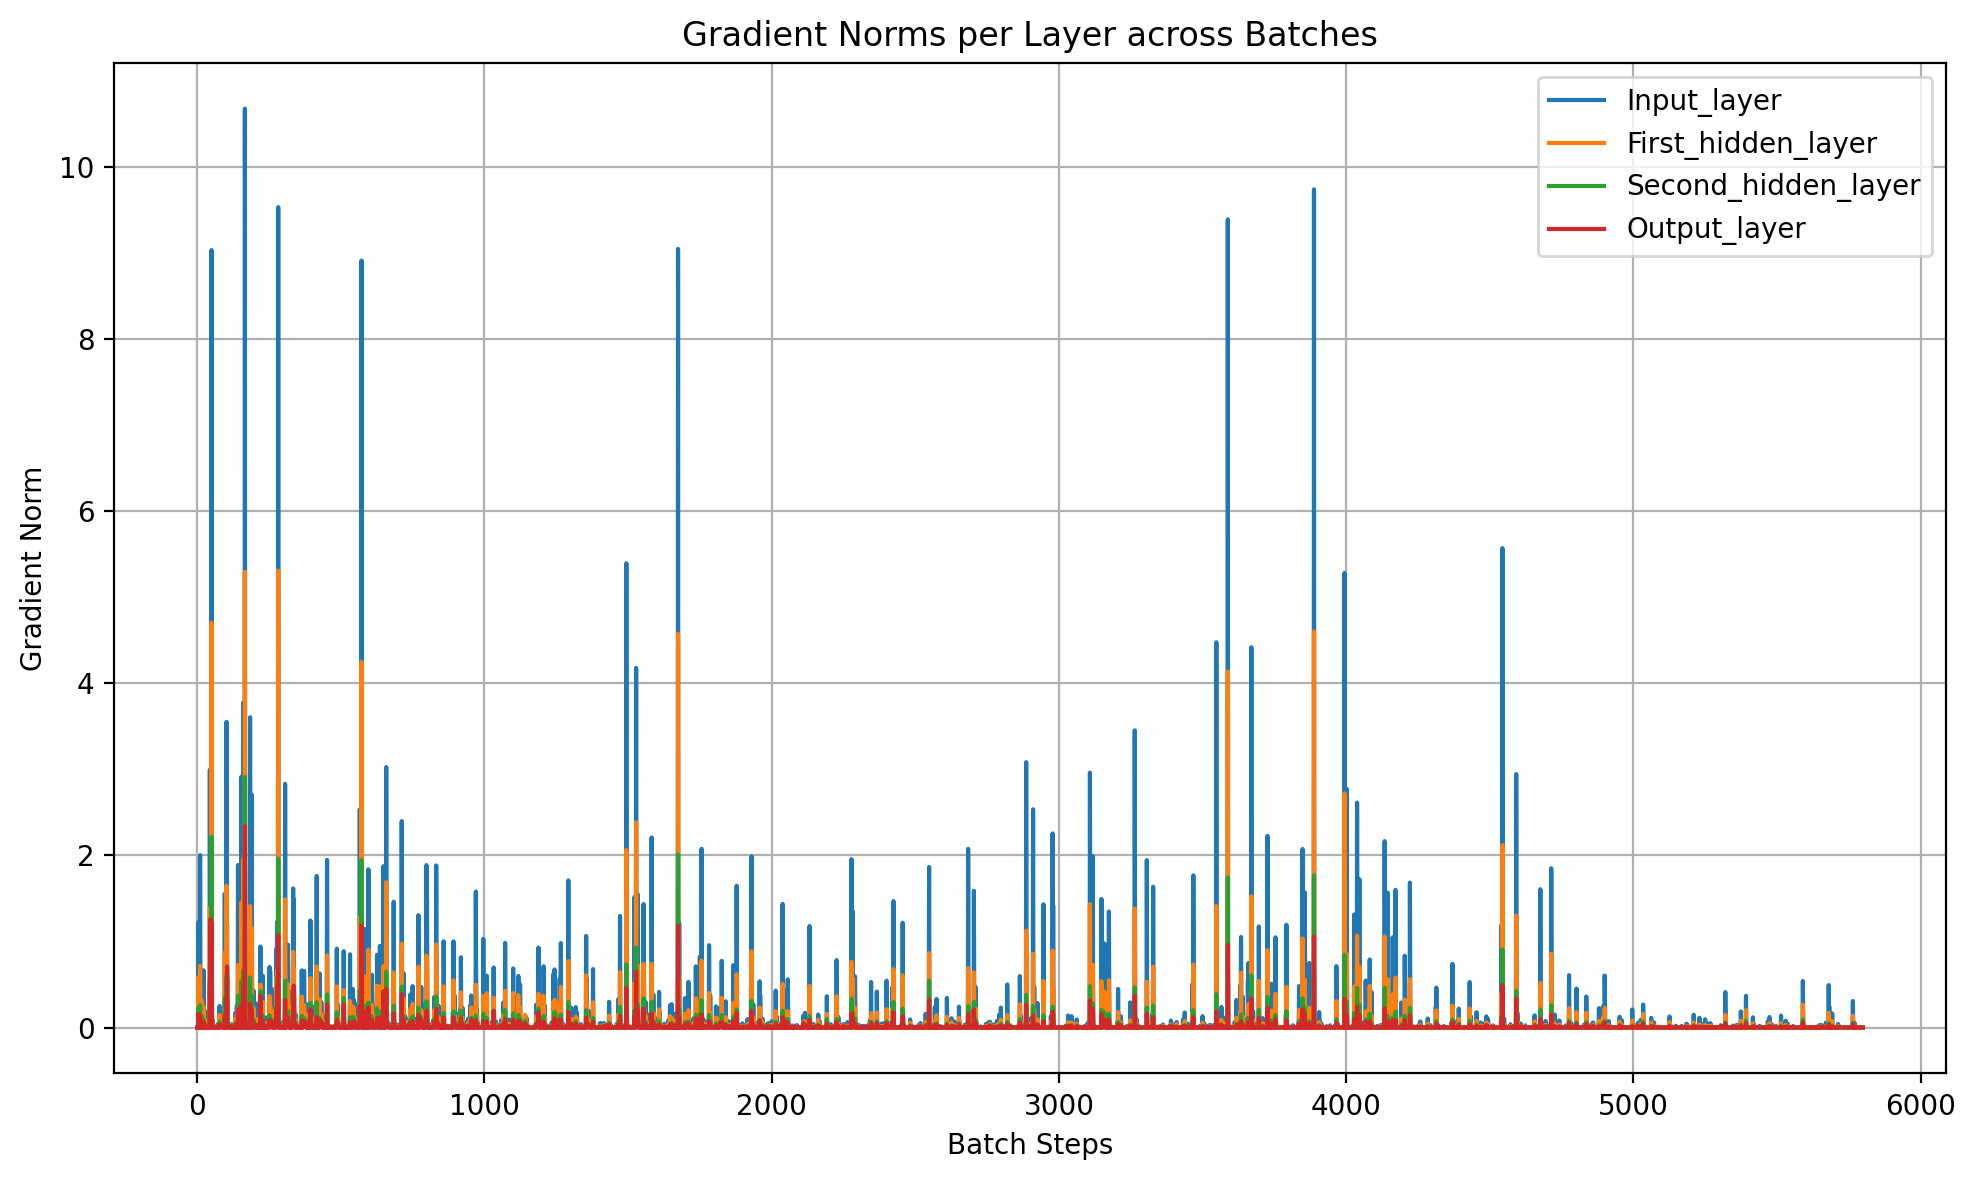

In [13]:
# Create result directory if not exists
import os
os.makedirs("results", exist_ok=True)

# Plot gradient norms for each layer
plt.figure(figsize=(10, 6), dpi= 200)
for layer_name, norms in gradient_norms.items():
    plt.plot(norms, label=layer_name)

plt.title("Gradient Norms per Layer across Batches")
plt.xlabel("Batch Steps")
plt.ylabel("Gradient Norm")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("results/gradient_flow_per_layer.png")
plt.show()


## Binary Cross Entropy Loss

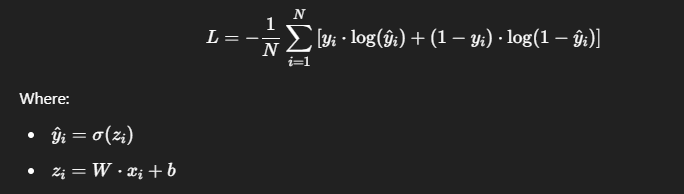

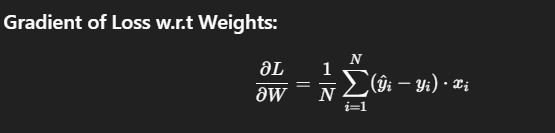

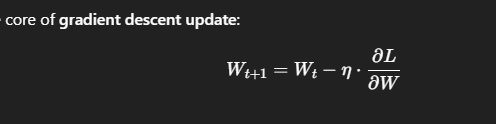

Epoch 1: Loss = 0.0002, Avg. Grad Norm = 0.0010
Epoch 2: Loss = 0.0002, Avg. Grad Norm = 0.0012
Epoch 3: Loss = 0.0002, Avg. Grad Norm = 0.0010
Epoch 4: Loss = 0.0001, Avg. Grad Norm = 0.0008
Epoch 5: Loss = 0.0000, Avg. Grad Norm = 0.0002
Epoch 6: Loss = 0.0021, Avg. Grad Norm = 0.0171
Epoch 7: Loss = 0.0111, Avg. Grad Norm = 0.0348
Epoch 8: Loss = 0.0002, Avg. Grad Norm = 0.0005
Epoch 9: Loss = 0.0000, Avg. Grad Norm = 0.0002
Epoch 10: Loss = 0.0075, Avg. Grad Norm = 0.0480
Epoch 11: Loss = 0.0002, Avg. Grad Norm = 0.0033
Epoch 12: Loss = 0.0001, Avg. Grad Norm = 0.0002
Epoch 13: Loss = 0.0000, Avg. Grad Norm = 0.0001
Epoch 14: Loss = 0.0020, Avg. Grad Norm = 0.0170
Epoch 15: Loss = 0.0001, Avg. Grad Norm = 0.0003
Epoch 16: Loss = 0.0001, Avg. Grad Norm = 0.0004
Epoch 17: Loss = 0.0001, Avg. Grad Norm = 0.0002
Epoch 18: Loss = 0.0003, Avg. Grad Norm = 0.0024
Epoch 19: Loss = 0.0242, Avg. Grad Norm = 0.1396
Epoch 20: Loss = 0.0021, Avg. Grad Norm = 0.0175
Epoch 21: Loss = 0.0001, Avg.

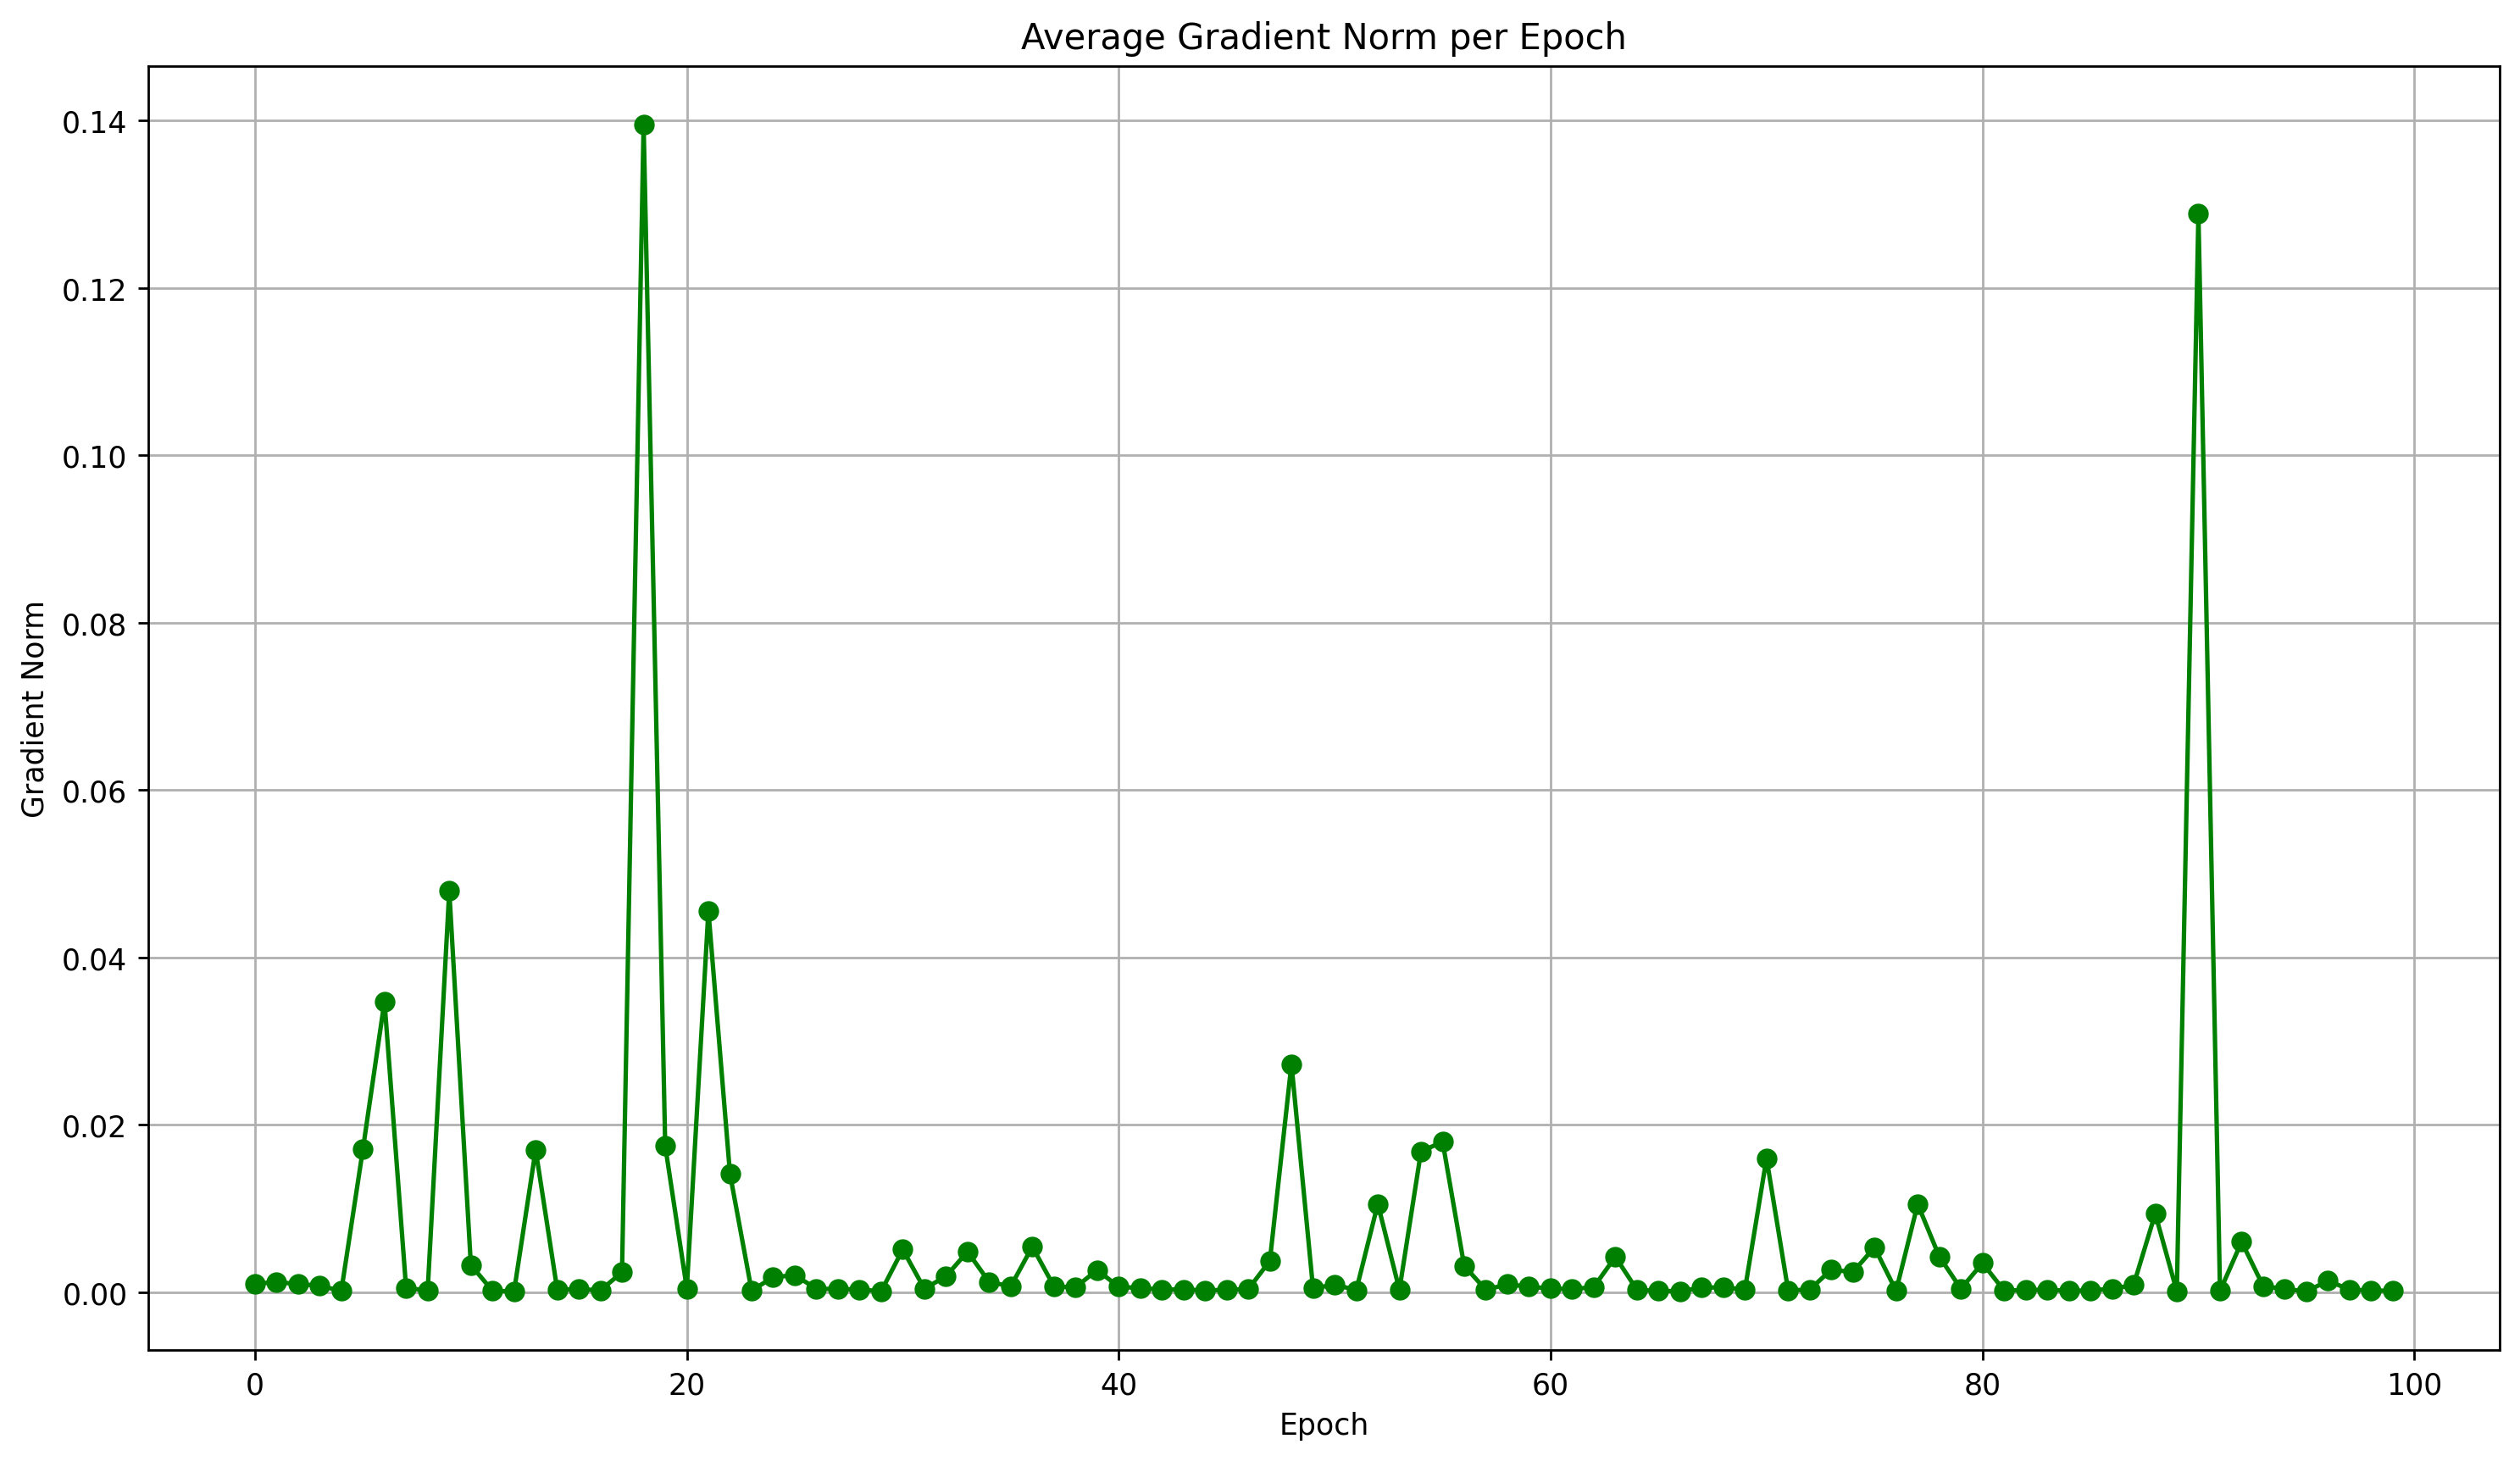

In [14]:
loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# To store gradient norms
gradient_norms = []

# Convert data to tensors
X_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_tensor = tf.convert_to_tensor(y_train.values.reshape(-1, 1), dtype=tf.float32)

# Training Loop for 100 epochs
for epoch in range(100):
    with tf.GradientTape() as tape:
        predictions = model(X_tensor, training=True)
        loss_value = loss_fn(y_tensor, predictions)

    # Compute gradients
    grads = tape.gradient(loss_value, model.trainable_weights)
    
    # Record gradient norms
    grad_norm = np.mean([tf.norm(g).numpy() for g in grads if g is not None])
    gradient_norms.append(grad_norm)

    # Apply gradients
    optimizer.apply_gradients(zip(grads, model.trainable_weights))

    print(f"Epoch {epoch+1}: Loss = {loss_value:.4f}, Avg. Grad Norm = {grad_norm:.4f}")

# Plot gradient norms
plt.figure(figsize=(12, 7), dpi=250)
plt.plot(gradient_norms, marker='o', color='green')
plt.title("Average Gradient Norm per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.grid(True)
plt.tight_layout()
plt.savefig("results/gradient_flow.png")
plt.show()
